In [2]:
from supernova import supernova
from models import *
import configparser

#### Note:
Currently, this module only performs simple curve fitting. Calling `model.get_fitted_values` will return to you the result of calling `scipy.optimize.curve_fit`.

In the cell below, type the name of your config file.
Ensure that your config file contains the following parameters:
   1. start_SN
   2. end_SC
   3. ebv_host
   4. ebv_mw
   5. mcore
   6. bestEk3
   7. dist_SN
   8. FILENAME


In [20]:
# Name of input file here:
input_file = ...

Your input file must be a csv.
It must contain the following columns:
1. MAG (Observed magnitude)
2. MAGERR (Error in observed magnitude)
3. FLT (Filter)
4. MJD (Modern Julian Date)

If your column names are different, change them using 
`model.set_colname(preferred_name)`.

In [11]:
'''This cell parses the config file into a usable dictionary.'''

config = configparser.ConfigParser()
config.read(input_file)
details_dict = {}
for key, val in config.items('DEFAULT'):
    if key != 'filename':
        details_dict[key] = float(val)
    else:
        details_dict[key] = val
        assert val[-3:] == 'csv', 'File must be .csv'

In [12]:
#displays details dict
details_dict

{'start_sn': 59292.7,
 'end_sc': 59297.0,
 'ebv_host': 0.0,
 'ebv_mw': 0.03,
 'mcore': 1.0,
 'bestek3': 0.13,
 'dist_sn': 30.5,
 'filename': 'sn2021gno_phot_0228.csv'}

### Piro 2015

In [13]:
piro15test = PIRO_2015(details_dict)

In [14]:
piro15test

In [15]:
piro15test.get_fitted_values()

Piro 2015 model simple curve fitted values:
Re = 61.92655410400258 +/- 8.848677859310634
Me = 0.017724630354914155 +/- 0.002355179994351027
Offset = 1.9449495470645502e-21 +/- 0.09584243096493708


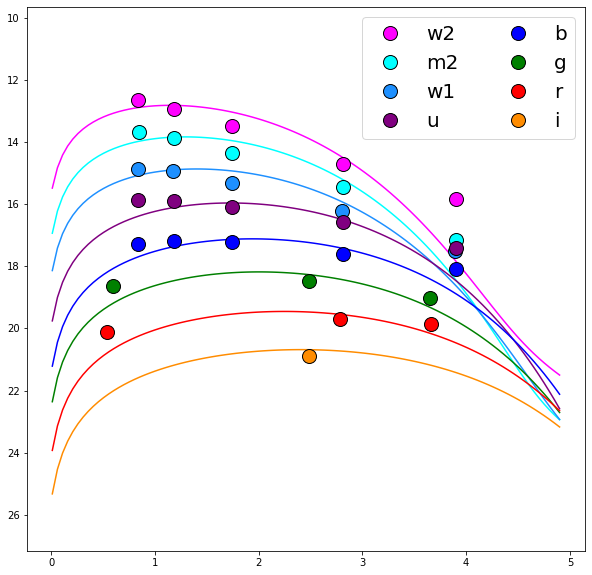

<Figure size 432x288 with 0 Axes>

In [16]:
test.plot()

### Sapir-Waxman BSG

In [17]:
swbsg_test = SW_BSG(details_dict)
swbsg_test.get_fitted_values()

Sapir-Waxman Blue Super Giant model simple curve fitted values:
Re = 40.49326303840088 +/- 2.740489592016623 R_Sun
Me = 0.49292337531456704 +/- 0.025243487930434332
Ve = 8356.258444672878 +/- 360.0805098276648 km/s
Offset = 0.2971255514198932 +/- 0.019631702644815542


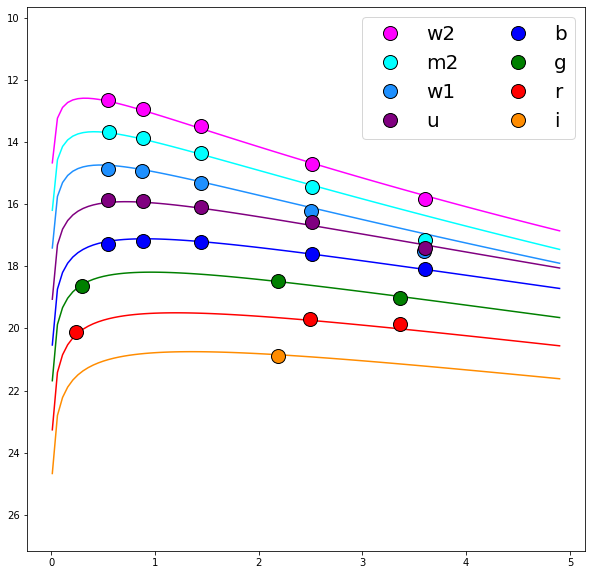

<Figure size 432x288 with 0 Axes>

In [19]:
swbsg_test.plot()

In order to change the fitting values (such as initial values, lower bounds and upper bounds), you can pass in your preferred values in the order of 
1. Radius
2. Mass
3. Velocity (optional)
4. Time offset

into the `model.get_fitted_values()` function.